Final project

Group of at most 3 people

1. pick a data set and expalin what you want to predict
2. Clean the data, Scale it
3. Plot the data with PCA, and also with each features, and see if prediction would be possible
4. Remove correlated features
5. Test all the models and pick the best one (One of the same 5 train/test split - so you make 5 different X_train, X_test) and plot the results. Only use cross_validate to find
the best number of neighbors
6. Test the best model on another split with confusion matrix and plot, which features is important.
7. Train on the whole set with the best model and predict values you pick
8. Try an ensemble model and compare it to the best model
ensemble model - pick multiple models that predict something, and do the average/linear regression on those model's results

proj due december 1st

points for cleanliness

plots explaining dataset, how it looks, features, what you predict, clean it

find best mode, conf matrix

the more complex dataset, the more points its worth

same split, for cross validate

try to do a model we have not done

want boundary plot, feature importance

cares more about explanation than model or accuracy

remove nulls, if you can't pick the medians

convert yes/no strings to 0/1

know group and dataset before break

histograms of yes and no, boxplot, graphs of 1 feature vs another

predictions

In [76]:
import pandas as pd
import numpy as np
#from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import decomposition

import warnings
warnings.filterwarnings("ignore")

In [77]:
df = pd.read_csv("reviews.csv")
df = df.drop(columns=["Unnamed: 0"])
df.describe()

,rating,seat_comfort,cabin_staff_service,food_and_beverages,inflight_entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended,verified
count,1998.000000,1885.000000,1879.000000,1450.000000,1320.000000,1939.000000,1159.000000,1998.000000,1998.000000,1998.000000
mean,3.285786,2.485411,2.759979,2.487586,2.833333,2.195977,2.283865,2.097598,0.244244,0.679680
std,3.264797,1.436713,1.601841,1.466976,1.581099,1.569433,1.513785,1.487381,0.429746,0.466716
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000


Initial analysis

In [78]:
for col in df.columns:
    print("Column name: " + col + " NAs: " + str(df[col].isna().sum()) + " Datatype: " + str(df[col].dtype))

Column name: rating NAs: 0 Datatype: int64
Column name: aircraft NAs: 1622 Datatype: object
Column name: type_of_traveller NAs: 0 Datatype: object
Column name: cabin_flown NAs: 0 Datatype: object
Column name: route NAs: 20 Datatype: object
Column name: date_flown NAs: 0 Datatype: object
Column name: seat_comfort NAs: 113 Datatype: float64
Column name: cabin_staff_service NAs: 119 Datatype: float64
Column name: food_and_beverages NAs: 548 Datatype: float64
Column name: inflight_entertainment NAs: 678 Datatype: float64
Column name: ground_service NAs: 59 Datatype: float64
Column name: wifi_and_connectivity NAs: 839 Datatype: float64
Column name: value_for_money NAs: 0 Datatype: float64
Column name: recommended NAs: 0 Datatype: int64
Column name: verified NAs: 0 Datatype: int64
Column name: review NAs: 0 Datatype: object


In [79]:
#wordcloud
""" text = " ".join(review for review in df.review)

stopwords = set(STOPWORDS)
stopwords.update(["flight", "Delta", "one", "told", "took", "said", "two", "make", "given", "minute",
                  "asked", "still", "way", "hour", "will", "really", "u", "got", "without", "say", "better", "take",
                  "overall", "much", "return", "fly", "us", "even", "go", "getting", "airline", "flights", "another"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") """
#plt.figure(figsize=[10,10])

' text = " ".join(review for review in df.review)\n\nstopwords = set(STOPWORDS)\nstopwords.update(["flight", "Delta", "one", "told", "took", "said", "two", "make", "given", "minute",\n                  "asked", "still", "way", "hour", "will", "really", "u", "got", "without", "say", "better", "take",\n                  "overall", "much", "return", "fly", "us", "even", "go", "getting", "airline", "flights", "another"])\n\nwordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)\n\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off") '

Text(0.5, 1.0, 'Correlation Matrix')

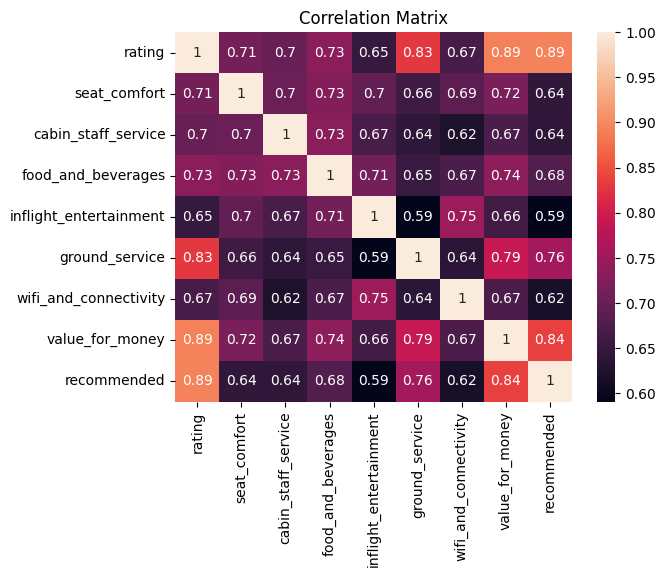

In [80]:
#correlation matrix
df_numerical = pd.concat([df["rating"], df[df.columns[6:14]]], axis=1)
corrmat = df_numerical.corr()

sns.heatmap(corrmat, annot=True)
plt.title("Correlation Matrix")

In [81]:
#drop nas
df_no_na = df_numerical.dropna()
#predict recommended
X = df_no_na[df_no_na.columns[0:8]]
y = df_no_na["recommended"]

Amount of rows with no NAs: 1018
PCA component weight:
[[ 0.68201288  0.2583285   0.28295311  0.26363575  0.27786971  0.29070003
   0.26119766  0.29768482]
 [-0.57232367  0.26792258  0.32417587  0.26312738  0.49649071 -0.13674664
   0.3809336  -0.12658598]]


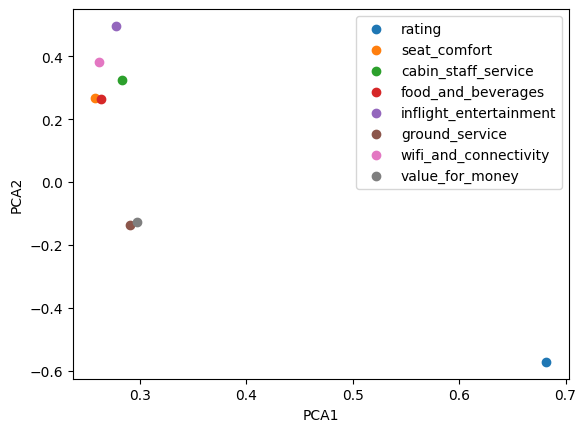

In [82]:
#pca
pca = decomposition.PCA(n_components=2)
print("Amount of rows with no NAs: " + str(len(df_no_na)))
X_pca = pca.fit_transform(X)

weights = pca.components_
labels = X.columns.to_list()
print("PCA component weight:\n" + str(pca.components_))

for i in range(len(X.columns)):
    plt.scatter(weights[0,i],weights[1,i],label=labels[i])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

Text(0, 0.5, 'PCA2')

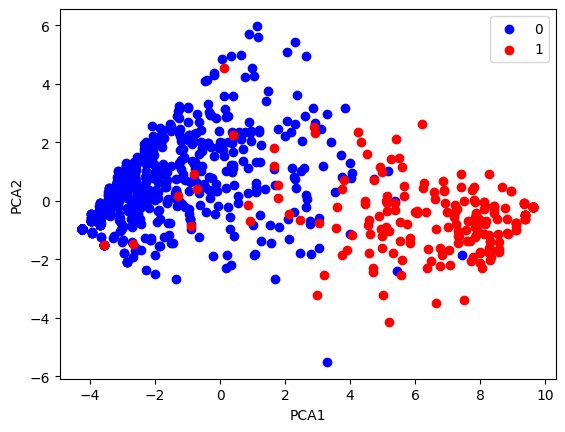

In [83]:
#plot data
cat_0_indexes=np.where(y==0)[0]
cat_1_indexes=np.where(y==1)[0]
plt.scatter(X_pca[cat_0_indexes,0],X_pca[cat_0_indexes,1],c='b',label="0")
plt.scatter(X_pca[cat_1_indexes,0],X_pca[cat_1_indexes,1],c='r',label="1")
plt.legend()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

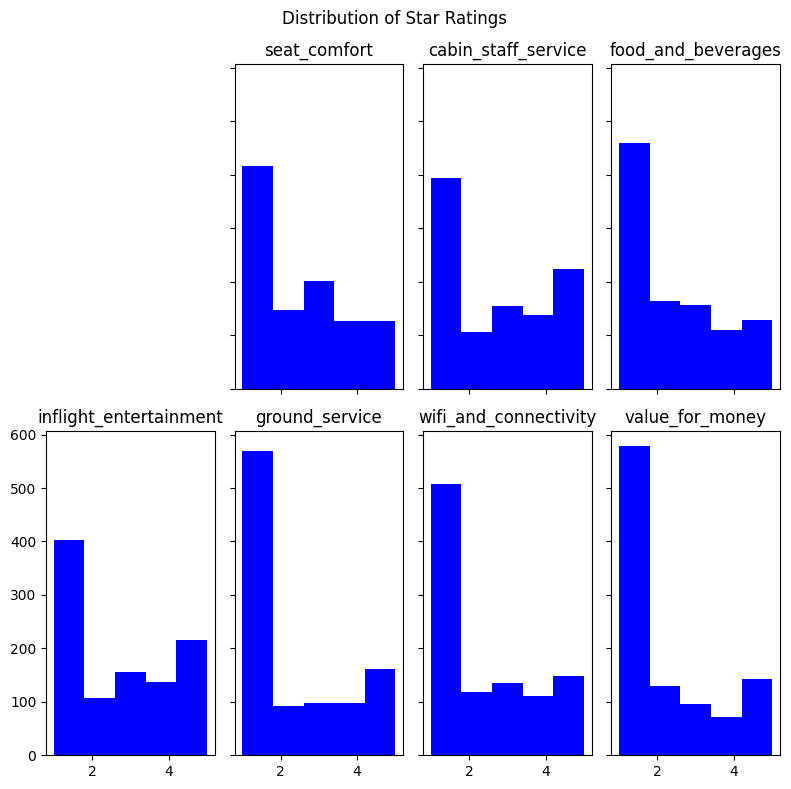

In [84]:
# Unique categories in each variable
col_names = X.columns

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(8, 8), sharex=True, sharey=True)


# Loop through each category combination and plot histogram
for i in range(1, len(col_names)):
    current = axes[i//4, i % 4]
    current.hist(X[col_names[i]], bins=5, color='blue', alpha=1)
    current.set_title(col_names[i])

fig.suptitle("Distribution of Star Ratings")
axes[0, 0].remove()
# Adjust layout
plt.tight_layout()
plt.show()

final analysis: ground service and food and beverages were dropped

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

GBCmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBCmodel.fit(X_train, y_train)
y_pred = GBCmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier")
print(f'Accuracy: {accuracy:.4f}')

Gradient Boosting Classifier
Accuracy: 0.9657


In [86]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import random

seed = random.seed(22)


# Split with random state for reproducibility
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)

# KNN
best_neighbors = None
best_score = 0

for n_neighbors in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_validate(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_score = np.mean(scores['test_score'])
    
    if mean_score > best_score:
        best_score = mean_score
        best_neighbors = n_neighbors

# Train the best KNN model
best_knn_model = KNeighborsClassifier(n_neighbors=best_neighbors)
best_knn_model.fit(X_train, y_train)

# Evaluate KNN
y_pred = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {knn_accuracy:.4f}")

# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Evaluate Random Forest
y_pred = clf_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred = logistic_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression:{logreg_accuracy:.4f}")

# SVM
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"SVM: {svm_accuracy:.4f}")

# Gradient Boosting
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
GBCmodel = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
GBCmodel.fit(X_train, y_train)

# Evaluate Gradient Boosting 
y_pred = GBCmodel.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting: {gb_accuracy:.4f}")


KNN Model Accuracy: 0.9314
Random Forest Accuracy: 0.9608
Logistic Regression:0.9804
SVM: 0.9706
Gradient Boosting: 0.9412


In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
import warnings

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(40,),(20,), (64,), (128,), (40, 20)],
    'max_iter': [8,15, 50, 75, 100]
}

clf = MLPClassifier(solver="sgd",
                    random_state=1,
                    alpha=1e-4,
                    learning_rate_init=0.5,)

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Suppress ConvergenceWarnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")


grid_search.fit(X_train, y_train)

# Get the best model from the search
best_nn_clf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model 
y_pred = best_nn_clf.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred)
print(f"Neural Network: {nn_accuracy:.4f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15

Best Parameters: {'hidden_layer_sizes': (128,), 'max_iter': 15}
Neural Network: 0.9657


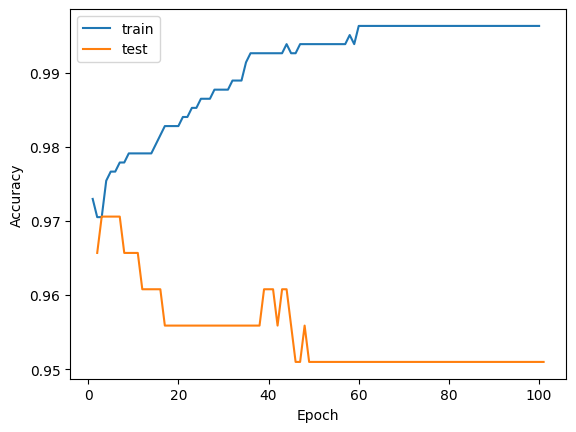

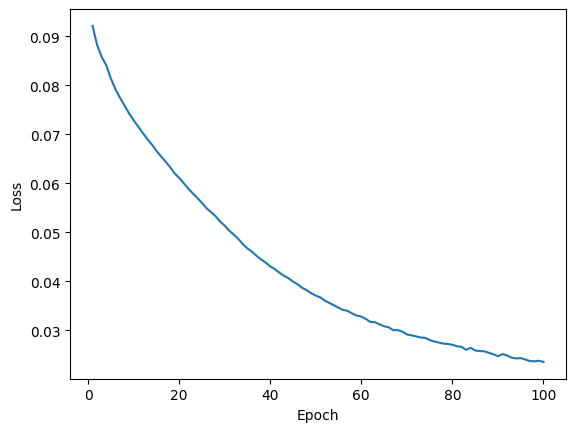

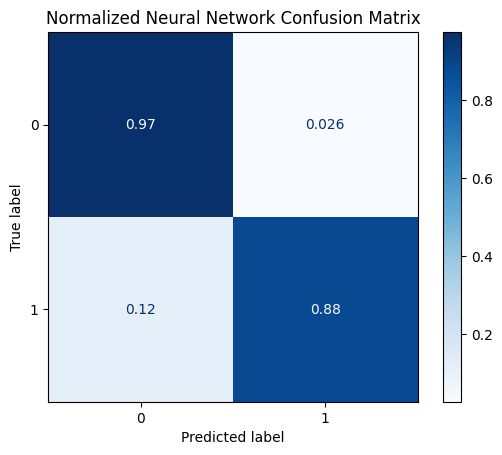

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)

""" # Initialize the MLPClassifier
clf = MLPClassifier(
    hidden_layer_sizes=(128),
    max_iter=15,
    alpha=1e-4,
    solver="sgd",
    verbose=0,
    random_state=1,
    learning_rate_init=0.5,
) """

N = 100
s1=[]
s2=[]
l = []

for i in range(N):
    best_nn_clf.partial_fit(X_train, y_train,classes=np.unique(y_train))
    s1.append(best_nn_clf.score(X_train, y_train))
    s2.append(best_nn_clf.score(X_test, y_test))
    l.append(best_nn_clf.loss_)

# Plotting the accuracy for training and test sets
plt.figure(1)
plt.plot(np.arange(1,N+1),s1,label='train')
plt.plot(np.arange(1,N+1)+1,s2,label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting the loss
plt.figure(2)
plt.plot(np.arange(1,N+1),l,label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

disp_nn = ConfusionMatrixDisplay.from_estimator(
    best_nn_clf,
    X_test,
    y_test,
    display_labels=best_nn_clf.classes_,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp_nn.ax_.set_title('Normalized Neural Network Confusion Matrix')
plt.show()


Logistic Regression:0.9559


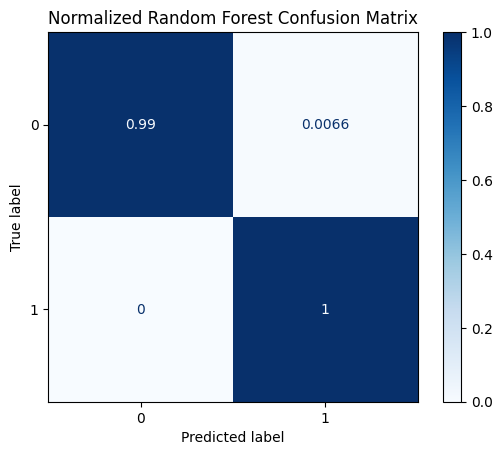

In [89]:
# Logistic Regression as the best model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred = logistic_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression:{logreg_accuracy:.4f}")

#Plot confusion matrix 
conf_matrix_rf = confusion_matrix(y_test, clf_rf.predict(X_test))
disp_rf = ConfusionMatrixDisplay.from_estimator(
    clf_rf,
    X_test,
    y_test,
    display_labels=clf_rf.classes_,
    cmap=plt.cm.Blues,
    normalize='true',
)
disp_rf.ax_.set_title('Normalized Random Forest Confusion Matrix')
plt.show()


In [90]:
# Feature importances
feature_importances = clf_rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': range(X.shape[1]), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


   Feature  Importance
0        0    0.369918
7        7    0.239471
5        5    0.102678
2        2    0.094668
1        1    0.073481
3        3    0.061662
6        6    0.030234
4        4    0.027887


the most important features are 0 and 7 

In [91]:
# Log reg
clf_rg = LogisticRegression()
clf_rg.fit(X, y)

data_point = [[ 47, 1, 77, 3, 9, 433, 1, 0]]
scaler.transform(data_point)

# Make predictions
prediction = clf_rg.predict(data_point)
print(prediction)

[1]


Given the point [ 47, 1, 77, 3, 9, 433, 1, 0], the Random Forest model predicted class 1, meaning a customer would recommed the airline